In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
# import dataset
df = pd.read_csv('C:/Users/DELL/Downloads/Crop Production data.csv')
# print first five rows
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


A state-wise Indian crop production dataset

In [3]:
# lets check shape of the dataset
df.shape

(246091, 7)

In [4]:
# in this dataset 246091 rows and 7 columns are present

In [5]:
# data type of every columns
df.dtypes

State_Name        object
District_Name     object
Crop_Year          int64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [6]:
# check missing values
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [7]:
# Okey So there is only one column that has missing value 
# in production 3730 missings

In [8]:
# fill missing values for target column production by mean
df['Production'].fillna(df['Production'].mean(),inplace  = True)
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

# Univariant 
### Univariate Analysis is a type of data visualization where we visualize only a single variable at a time. 
### Univariate Analysis helps us to analyze the distribution of the variable present in the data so that we can perform further analysis.

In [9]:
def univariant(df):
    import pandas as pd
    output_df = pd.DataFrame(columns =['Count','Missing','Numeric','Dtype','Unique','Mode','Mean','Min','.25%','Median','.75?%','Max','Std','Skew','Kurt'])
    for col in df:
        if df[col].isnull().sum() ==0:
            if pd.api.types.is_numeric_dtype(df[col]):
                output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),pd.api.types.is_numeric_dtype(df[col]),
                                     df[col].dtypes,df[col].unique(),df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(.25),
                                     df[col].median(),df[col].quantile(.75),df[col].max(),df[col].std(),df[col].skew(),df[col].kurt()]
                
            else:
                output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),pd.api.types.is_numeric_dtype(df[col]),
                                     df[col].dtypes,df[col].unique(),df[col].mode().values[0],
                                     '-','-','-','-','-','-','-','-','-']
                
    return output_df.sort_values(by = ['Numeric','Skew'],ascending = False)


import pandas as pd
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)
df = pd.read_csv('C:/Users/DELL/Downloads/Crop Production data.csv')

In [10]:
univariant(df)

,Count,Missing,Numeric,Dtype,Unique,Mode,Mean,Min,.25%,Median,.75?%,Max,Std,Skew,Kurt
Area,246091,0,True,float64,"[1254.0, 2.0, 102.0, 176.0, 720.0, 18168.0, 36...",1.0,12002.820864,0.04,80.0,582.0,4392.0,8580100.0,50523.404019,48.001278,5568.375426
Crop_Year,246091,0,True,int64,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 201...",2003,2005.643018,1997,2002.0,2006.0,2010.0,2015,4.952164,0.009581,-1.135214
State_Name,246091,0,False,object,"[Andaman and Nicobar Islands, Andhra Pradesh, ...",Uttar Pradesh,-,-,-,-,-,-,-,-,-
District_Name,246091,0,False,object,"[NICOBARS, NORTH AND MIDDLE ANDAMAN, SOUTH AND...",BIJAPUR,-,-,-,-,-,-,-,-,-
Season,246091,0,False,object,"[Kharif , Whole Year , Autumn , Rabi ...",Kharif,-,-,-,-,-,-,-,-,-
Crop,246091,0,False,object,"[Arecanut, Other Kharif pulses, Rice, Banana, ...",Rice,-,-,-,-,-,-,-,-,-


1.Count = In count we see that all cloumns as 246091 counts

2.Missing = In missing value there is no column has missing 

3.Numeric = here total 7 columns in which 4 are categorical and 2 are numeric

4.Dtype = dtype show us the data type

5.Unique = In this column show the unique values for every columns

6.Mode = mode show us which value frequent most in each column

7.Mean = mean column show the mean or average value for numeric columns and '-' for categorical column

8.Min = min show the minimum values for numeric columns

9.25% and 75% = show the percentile value

10.Median = show the middle value

11.Max = show maximum value for numeric columns


In [11]:
df.drop_duplicates()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [12]:
sum_pro = df['Production'].sum()
df['Percentage_of_Production'] = df['Production'].map(lambda x :(x/sum_pro )*100)
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_of_Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visulization

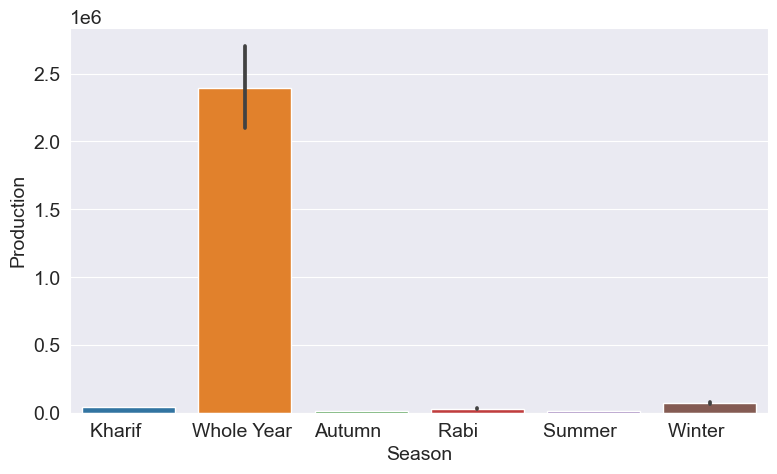

In [13]:
sns.barplot(x = 'Season',y = 'Production',data = df);

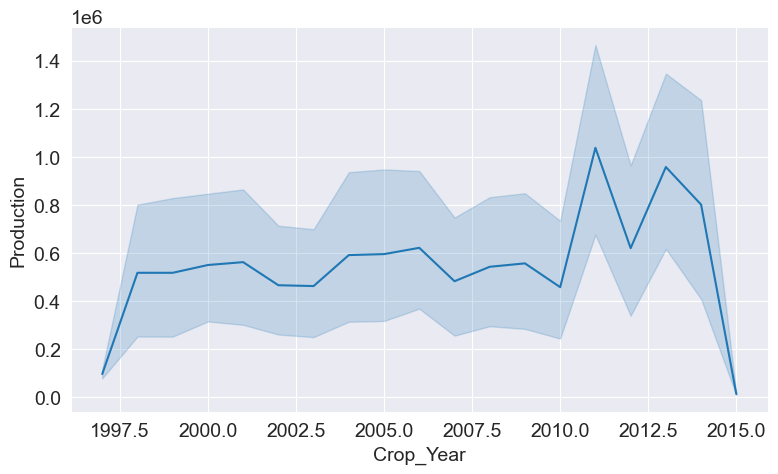

In [14]:
sns.lineplot(x = df['Crop_Year'],y = df['Production']);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

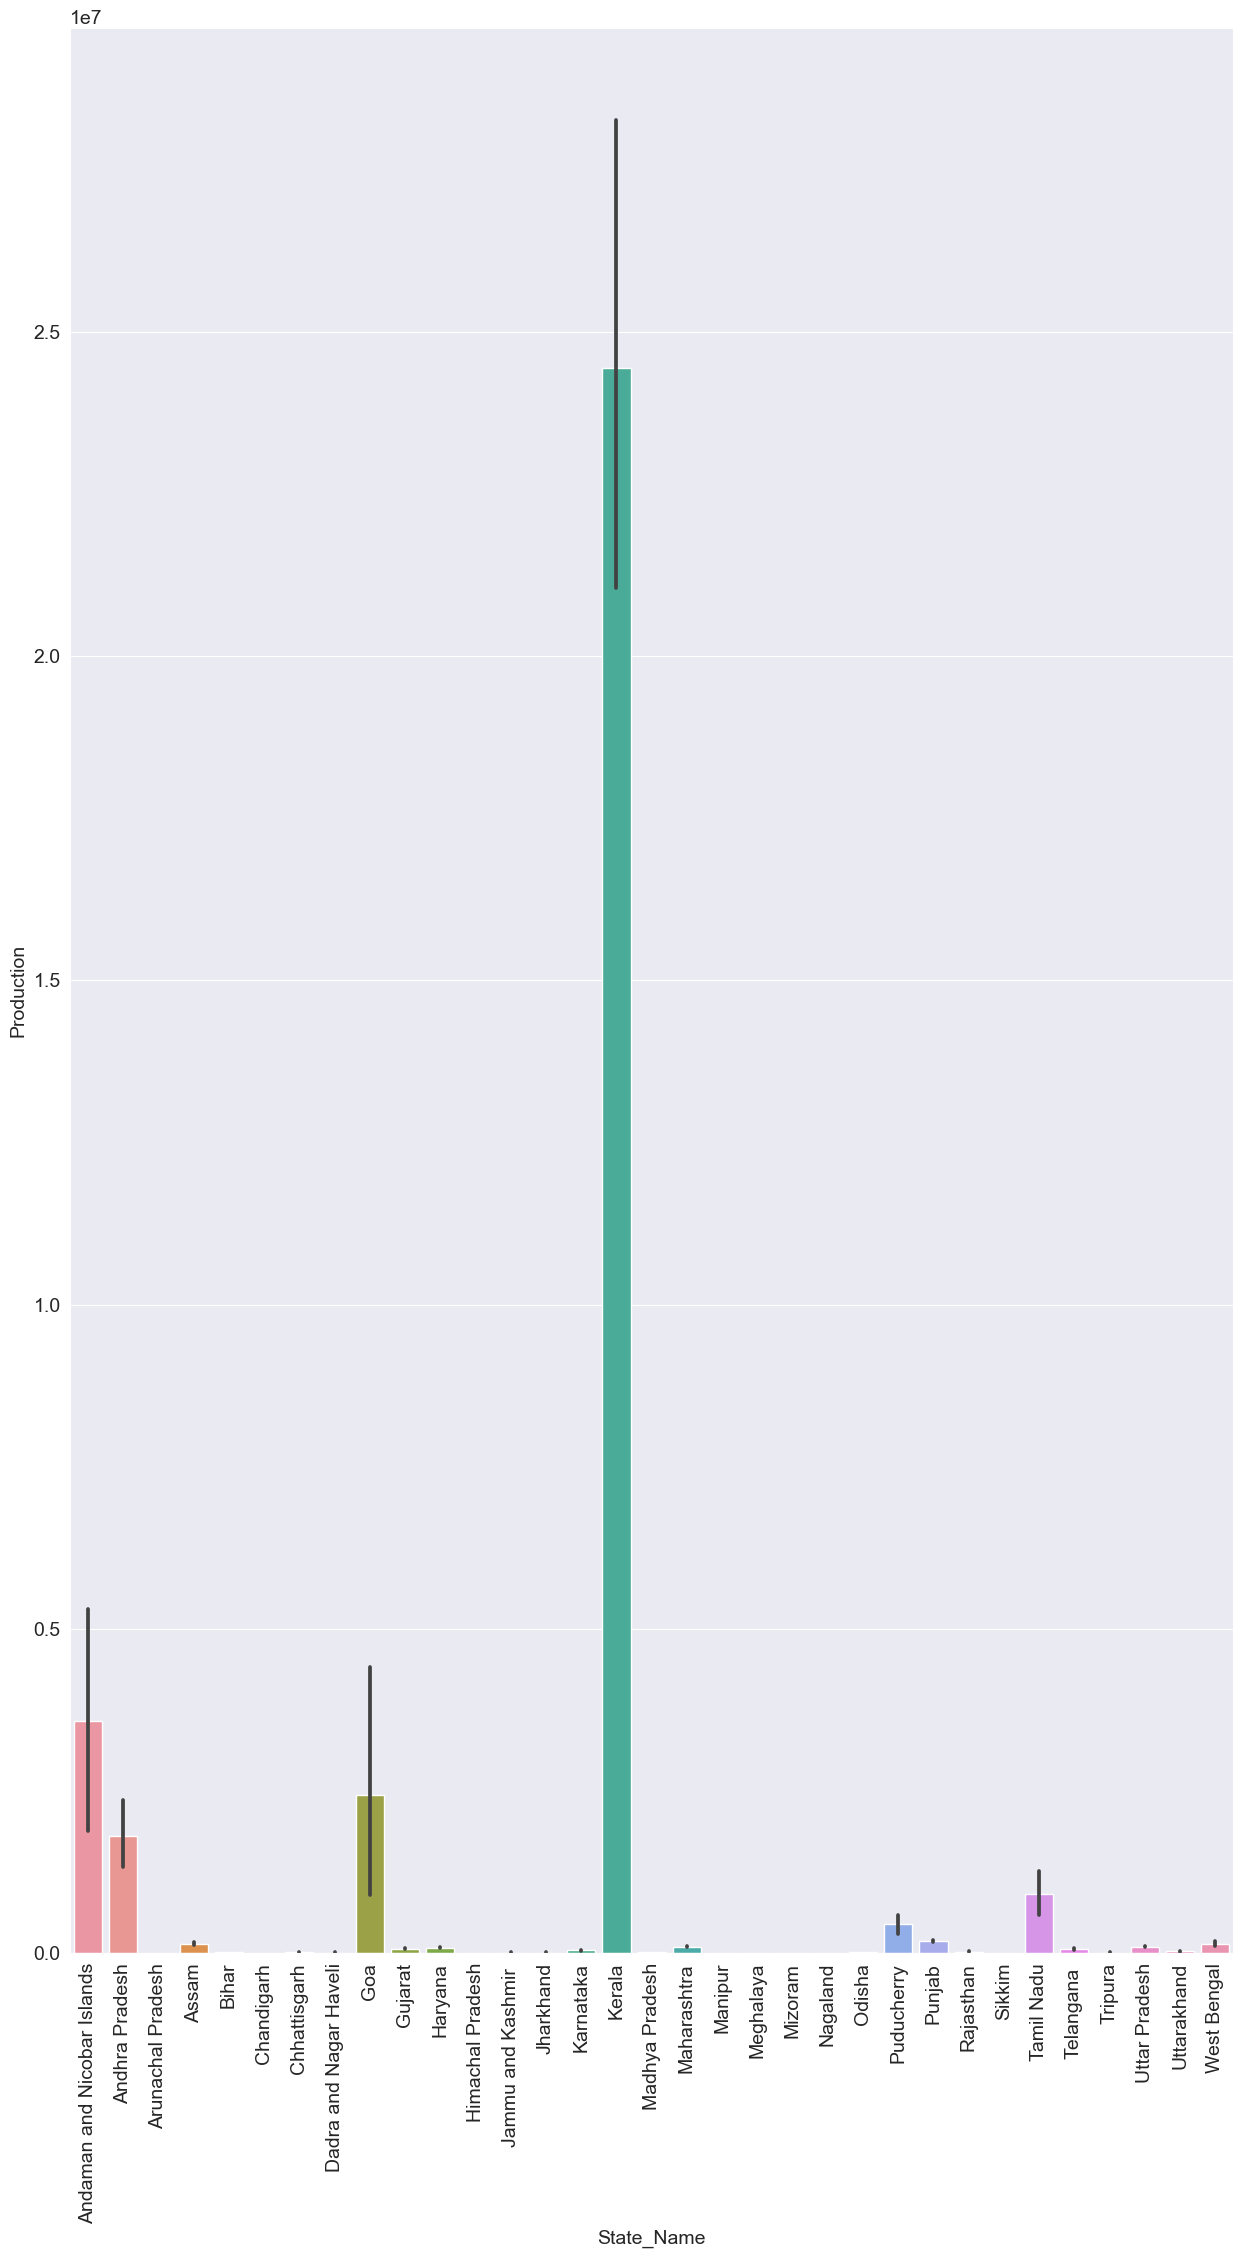

In [15]:
plt.figure(figsize = (15,25))
sns.barplot(x= 'State_Name',y = 'Production',data = df);
plt.xticks(rotation = 90)

Kerala's Outlier Status: Kerala's exceptional production levels, especially in terms of coconut production, indicate that it has unique agricultural conditions or practices that contribute to its high production. Factors such as favorable climate, soil quality, and specialized farming techniques may contribute to this outlier status.

Andhra Pradesh's Geographical Advantage: As Andhra Pradesh follows Kerala in terms of high production, it suggests that the state's geography plays a crucial role in supporting significant agricultural output. The state's diverse geography encompasses coastal regions, river deltas, and fertile plains, providing conducive conditions for growing various crops.

In [16]:
df.groupby('Season',axis = 0).agg({'Production':np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [17]:
df['Crop'].value_counts()

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Litchi                   6
Coffee                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [18]:
top_crop_pro =df.groupby('Crop')['Production'].sum().reset_index().sort_values(by = 'Production',ascending = False) 
top_crop_pro

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
...,...,...
71,Other Citrus Fruit,0.000000e+00
35,Cucumber,0.000000e+00
58,Litchi,0.000000e+00
54,Lab-Lab,0.000000e+00


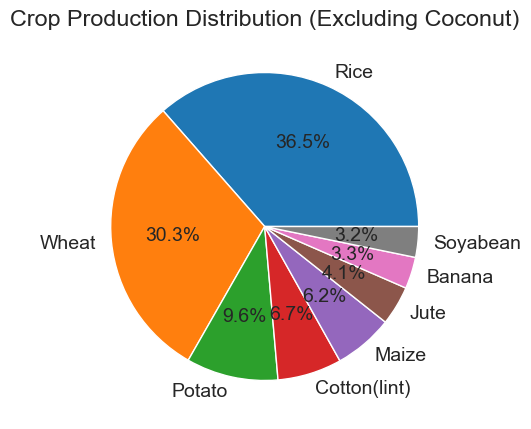

In [19]:
plot_pie = top_crop_pro[2:10]
crop_name = plot_pie['Crop']
production = plot_pie['Production']
plt.pie(production,labels = crop_name,autopct = '%1.1f%%')
plt.title('Crop Production Distribution (Excluding Coconut)')

plt.show()

Based on the information from the pie chart, we can draw the following insights:

Rice and Wheat Dominance: Rice and wheat are the two major crops in terms of production, comprising a significant portion of the total crop production. Rice accounts for approximately 36.5% of the production, while wheat contributes around 30.3%. These two crops are widely cultivated and consumed in India, highlighting their importance in the agricultural sector.

Diversification of Crops: While rice and wheat dominate the production, it is noteworthy that the other crops, such as potato, cotton, and maize, also contribute a substantial share. This indicates a certain level of diversification in crop cultivation, which is essential for maintaining a balanced agricultural system.

Importance of Potato: Potato production holds a significant share of approximately 9.6%. Potatoes are a versatile crop with high nutritional value and are extensively used in various culinary preparations. The significant production of potatoes highlights their importance in the Indian agricultural landscape and the food industry.

Cotton and Maize as Cash Crops: Cotton and maize contribute around 6.7% and 6.2% of the production, respectively. These crops are often grown as cash crops, meaning they have economic significance and contribute to the country's exports. The cultivation of cotton and maize supports the textile and feed industries, respectively.

Lesser Production of Coconut and Sugarcane: By excluding coconut and sugarcane as outliers, we can observe that their production is comparatively lower than other major crops. While coconut is the highest producer overall, its exclusion from the pie chart emphasizes the dominance of rice and wheat in the crop production landscape.

Overall, the insights from the pie chart highlight the prominence of rice and wheat in Indian crop production, the importance of diversification in crop cultivation, and the economic significance of crops such as potato, cotton, and maize.

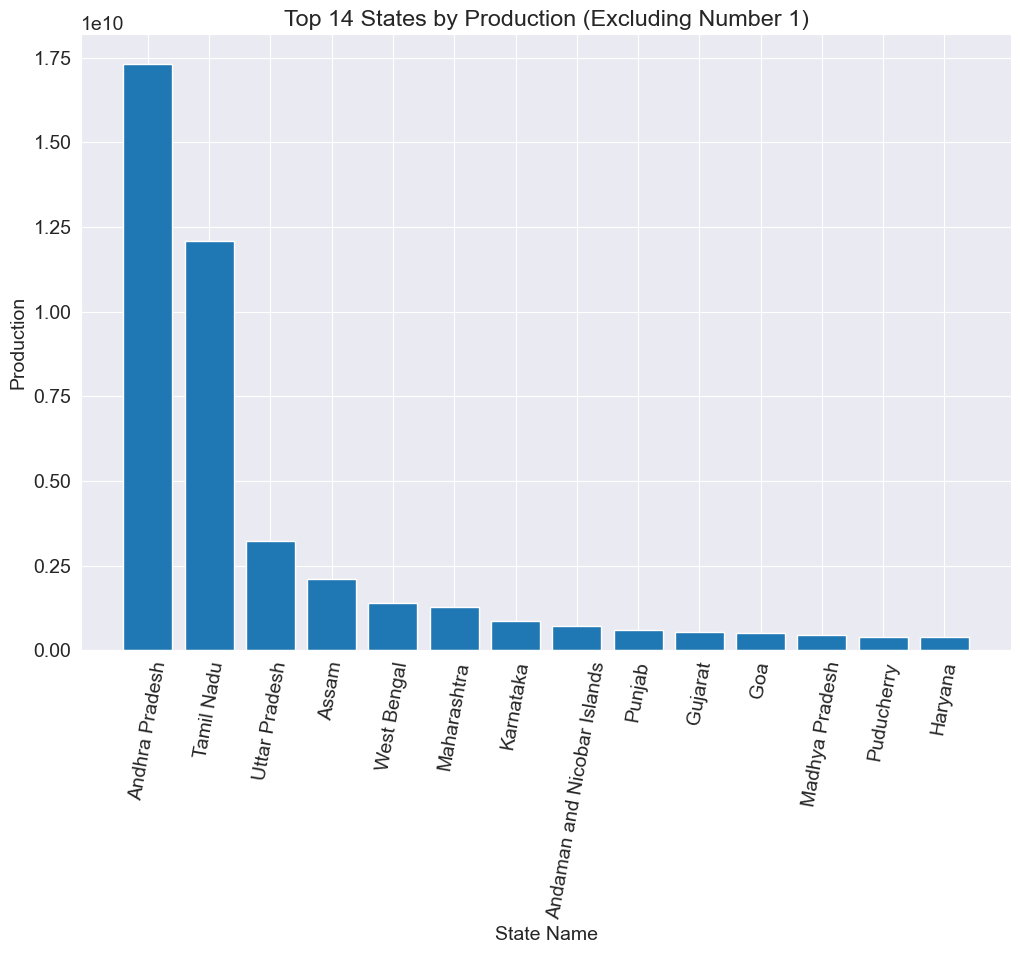

In [20]:
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending = False)
# state_production.head()
top_14_state = state_production[1:15]
# top_14_state
plt.figure(figsize = (12,8))
plt.bar(top_14_state.index,top_14_state.values)
plt.title('Top 14 States by Production (Excluding Number 1)')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.xticks(rotation = 80)
plt.show()

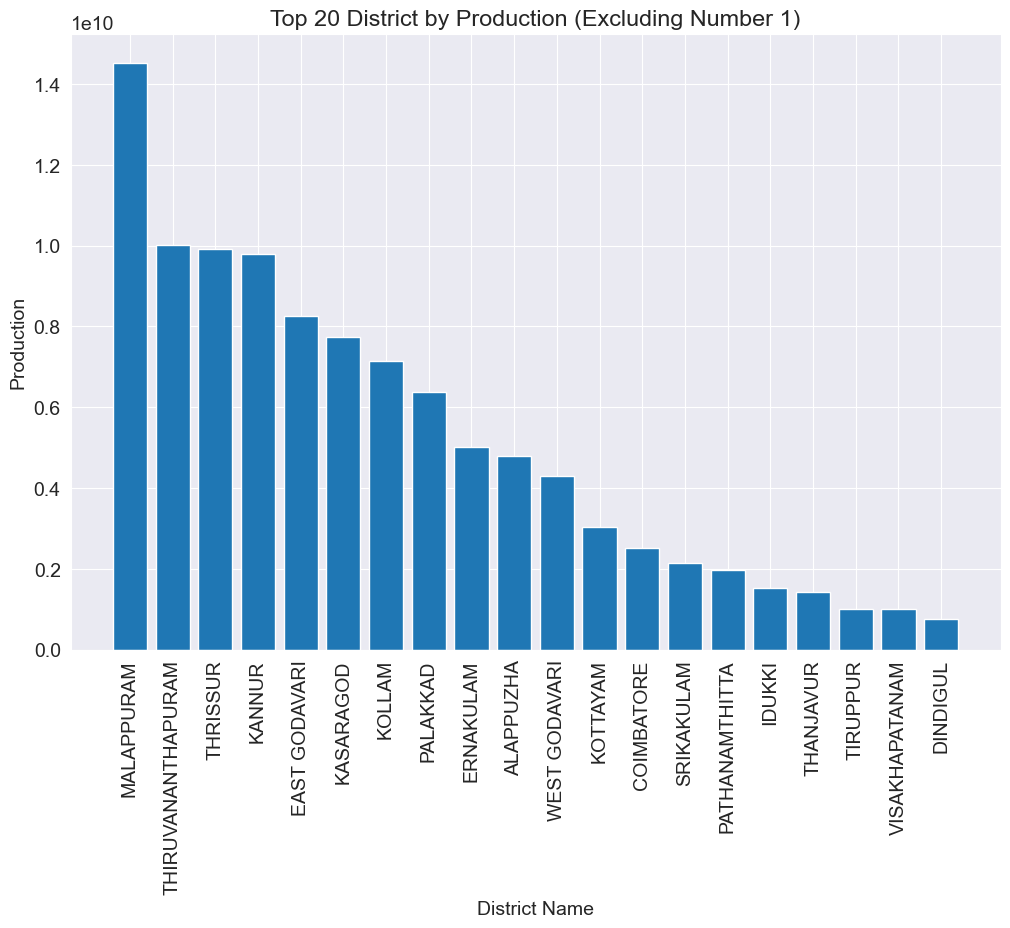

In [21]:
district_production = df.groupby('District_Name')['Production'].sum().sort_values(ascending = False)
# district_production
top_20_district = district_production[1:21]
plt.figure(figsize = (12,8))
plt.bar(top_20_district.index,top_20_district.values)
plt.title('Top 20 District by Production (Excluding Number 1)')
plt.xlabel('District Name')
plt.ylabel('Production')
plt.xticks(rotation = 90)
plt.show()

Insights:
Regional Dominance: The districts mentioned (Malappuram, Thiruvananthapuram, Thrissur, and Kannur) are located in the southern states of India, specifically in Kerala. This suggests that the southern region, particularly Kerala, has a significant contribution to overall crop production in the country.

Coconut Production: Given that coconut production is highest in South India, the dominance of these districts in terms of production could be attributed to the substantial cultivation and productivity of coconut in Kerala. As coconut is a major crop in Kerala, it likely plays a significant role in the overall production levels of these districts.

Agricultural Expertise: The high production in these districts might also be indicative of the agricultural expertise and practices prevalent in the southern states, particularly in Kerala. The farmers in these districts may have specialized knowledge and experience in coconut cultivation, contributing to the high production levels.

Climate and Geography: The suitable climate and geographical conditions in these districts, such as favorable temperatures, rainfall patterns, and soil fertility, could also contribute to the high crop production. These factors create an environment conducive to successful agricultural practices.

These inferences suggest that factors such as regional dominance, specialized knowledge, favorable climate and geography, and local economic impact contribute to the high production levels observed in these districts of Southern India.

In [22]:
wheat = df[df['Crop']=='Wheat']
wheat.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_of_Production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,1.416670e-07
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,1.416670e-07
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,2.082505e-07
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,2.103755e-07
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,1.508754e-07


C:\Users\DELL\python3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


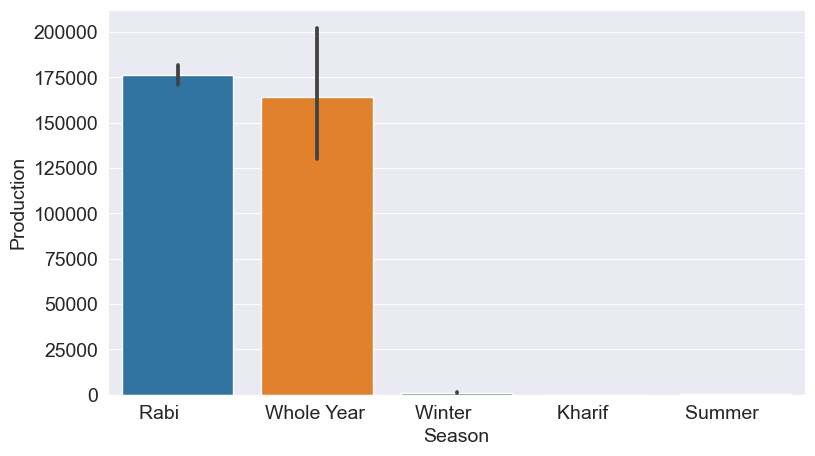

In [23]:
sns.barplot(x = wheat['Season'],y = wheat['Production']);

The above plot shows that Wheat Production in Rabi Season was comparatively much higher than other seasons, because Wheat is
majorly a Rabi crop.

C:\Users\DELL\python3\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


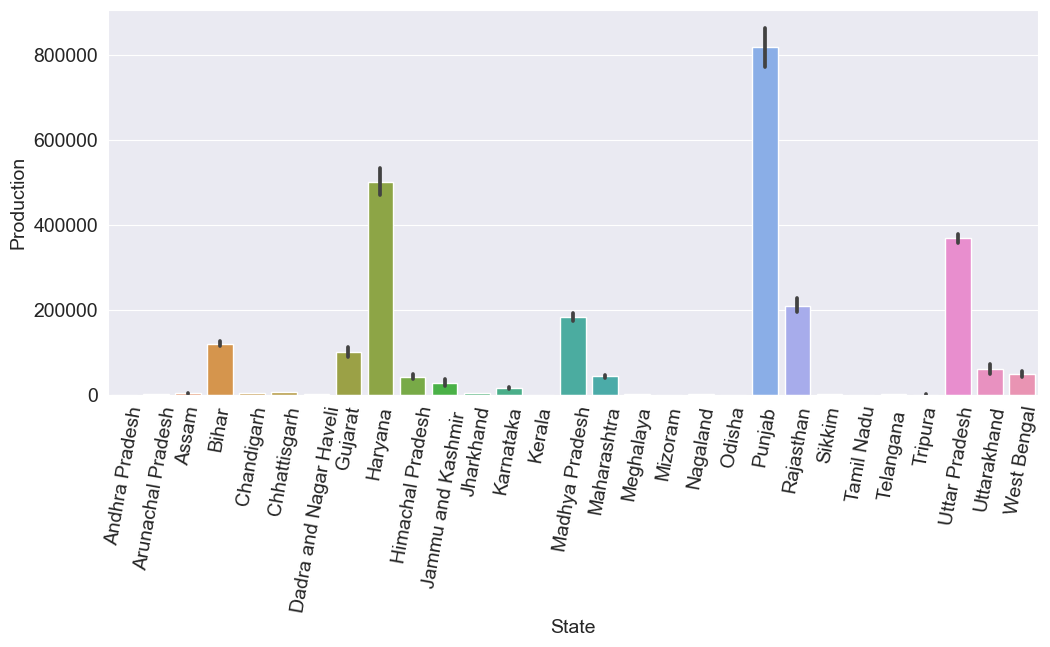

In [24]:
plt.figure(figsize = (12,5))
sns.barplot(x = wheat['State_Name'],y = wheat['Production'])
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation = 80)
plt.show()

Punjab: Punjab is known as the "Granary of India" due to its high agricultural productivity. The possible reasons for its highest wheat production are:

Fertile Soil: Punjab has rich alluvial soil, ideal for wheat cultivation, with a high nutrient content that supports robust crop growth.
Irrigation Facilities: Punjab benefits from an extensive canal irrigation system, ensuring sufficient water supply to the crops, especially during the critical growth stages.
Agricultural Expertise: Punjab has a history of agricultural expertise, with farmers employing modern farming techniques, advanced machinery, and improved crop varieties.
Haryana: Haryana, located adjacent to Punjab, also contributes significantly to wheat production. The possible reasons for its high wheat production are:

Fertile Soil: Haryana possesses fertile soil similar to Punjab, allowing for successful wheat cultivation and high yields.
Favorable Climate: The state experiences a favorable climate for wheat cultivation, including cool winters and warm summers, which are suitable for the crop's growth.
Irrigation Facilities: Haryana benefits from a well-developed irrigation infrastructure, ensuring consistent water availability for wheat crops.
Agricultural Expertise: Like Punjab, Haryana has a strong agricultural background and expertise, with farmers adopting modern agricultural practices and technologies.
Uttar Pradesh: While Uttar Pradesh is a major agricultural state, the districts with the highest wheat production were not specified. Therefore, it is not possible to provide specific reasons without district-level information.
    
    Punjab is the largest producer of wheat in the country followed by Haryana and Uttar Pradesh.

In [25]:
rice = df[df['Crop'] == 'Rice']
rice.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_of_Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,3.618459e-07
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,6.387058e-08
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,5.140388e-08


<AxesSubplot: xlabel='Season', ylabel='Production'>

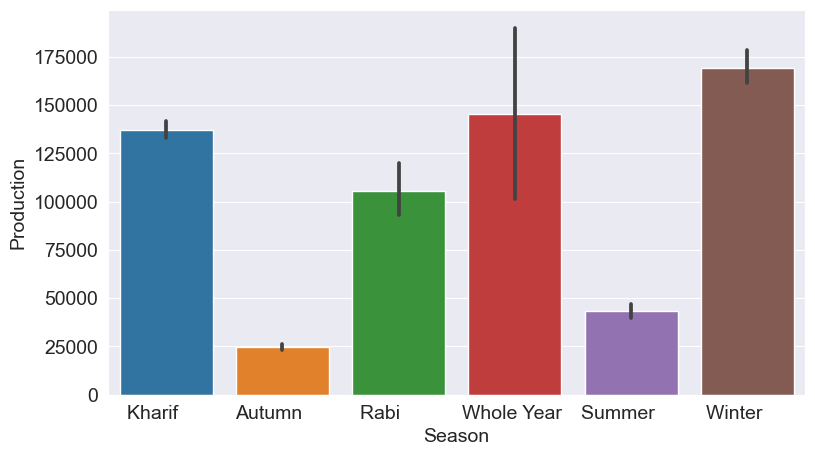

In [26]:
sns.barplot(x = rice['Season'],y = rice['Production'])

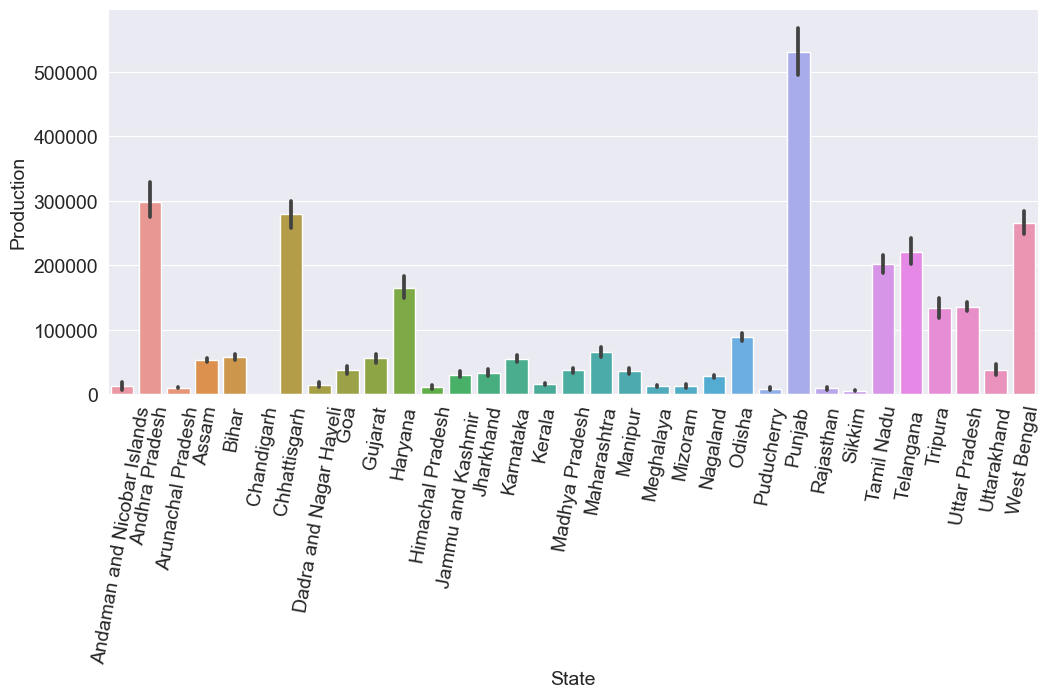

In [27]:
plt.figure(figsize = (12,5))
sns.barplot(x = rice['State_Name'],y = rice['Production'])
plt.xlabel('State')
plt.ylabel('Production')
plt.xticks(rotation = 80)
plt.show()

For Rice also, Punjab is the highest producer followed by Andhra Pradesh and West Bengal.

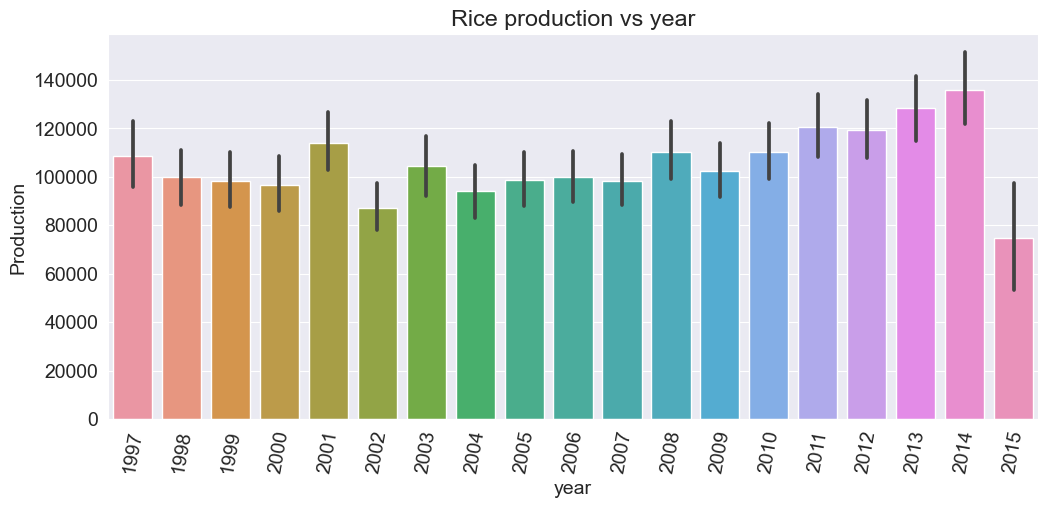

In [28]:
plt.figure(figsize = (12,5))
sns.barplot(x = rice['Crop_Year'],y = rice['Production'])
plt.title('Rice production vs year')
plt.xlabel('year')
plt.ylabel('Production')
plt.xticks(rotation = 80)
plt.show()

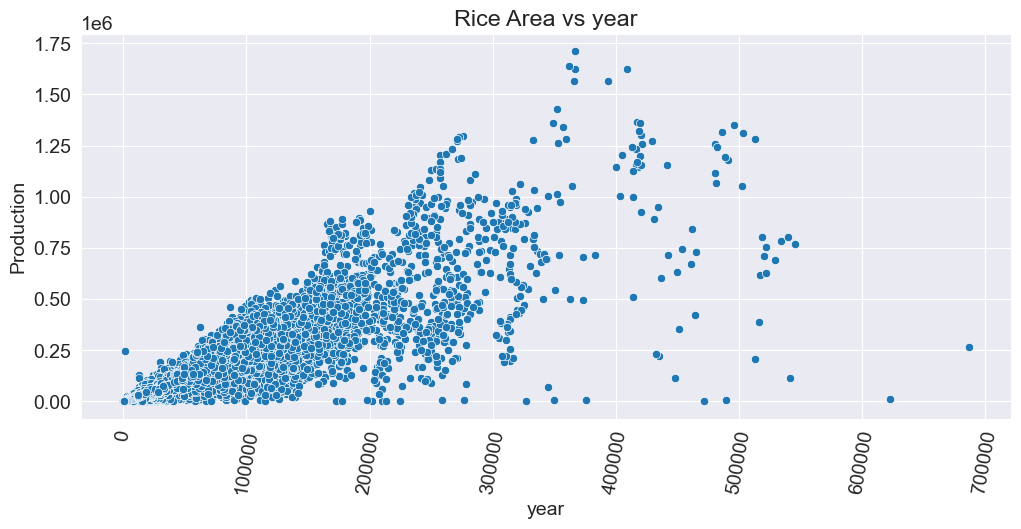

In [29]:
plt.figure(figsize = (12,5))
sns.scatterplot(x = rice['Area'],y = rice['Production'])
plt.title('Rice Area vs year')
plt.xlabel('year')
plt.ylabel('Production')
plt.xticks(rotation = 80)
plt.show()

The scatterplot showing most of the points concentrated near the origin suggests that there is a large number of districts with relatively lower production of both wheat and rice. These districts may have limited agricultural land or face challenges in terms of crop productivity.

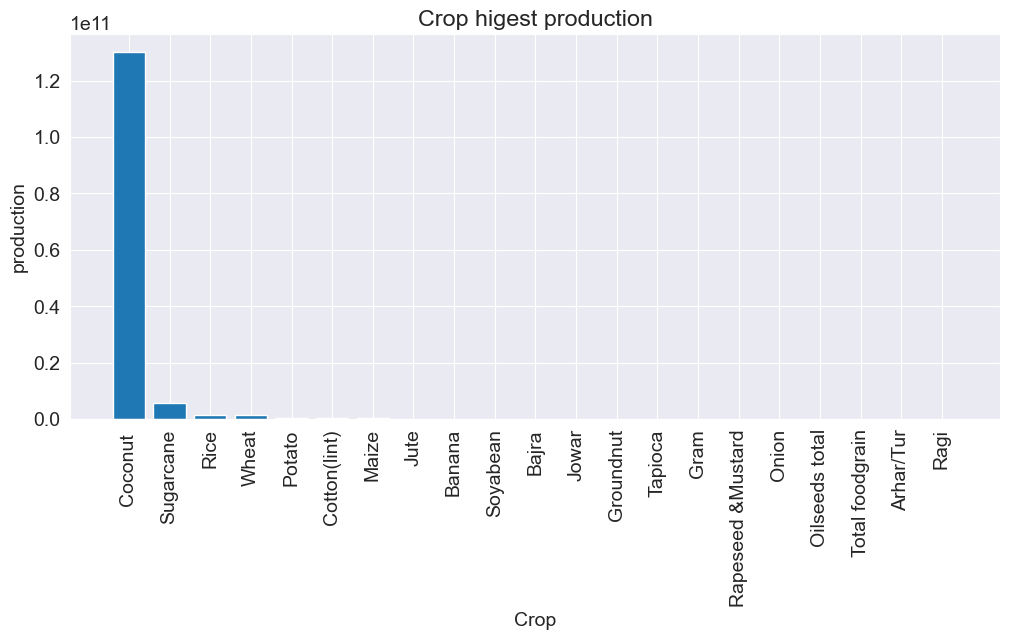

In [30]:
crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending = False)
# crop_production.head()
crop_production_20 = crop_production[:21]
plt.figure(figsize = (12,5))
plt.bar(crop_production_20.index,crop_production_20.values)
plt.title('Crop higest production')
plt.xlabel('Crop')
plt.ylabel('production')
plt.xticks(rotation = 90)
plt.show()

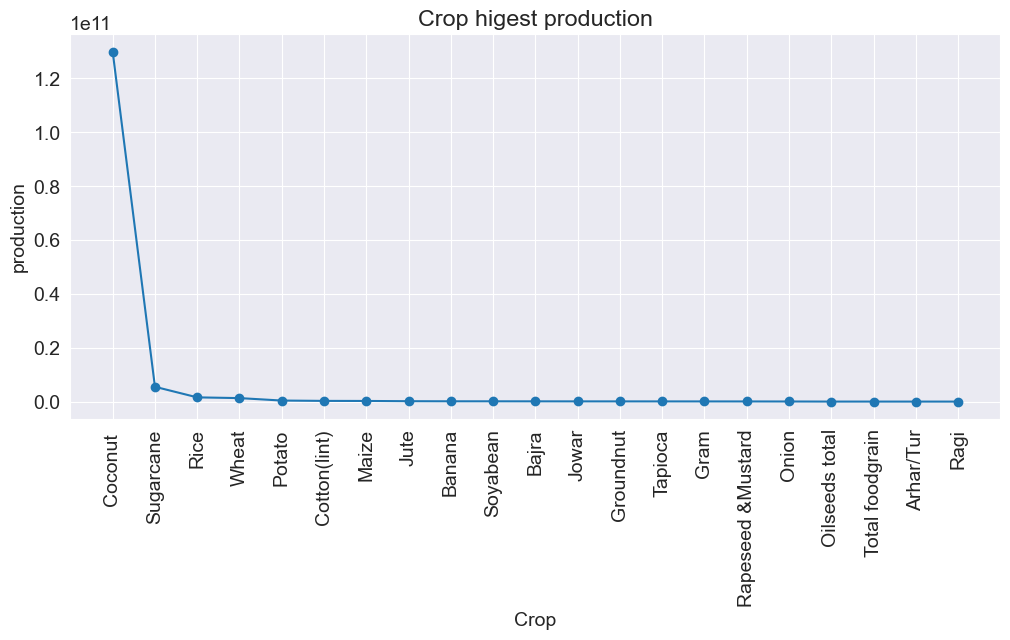

In [31]:
plt.figure(figsize = (12,5))
plt.plot(crop_production_20.index,crop_production_20.values,marker = 'o')
plt.title('Crop higest production')
plt.xlabel('Crop')
plt.ylabel('production')
plt.xticks(rotation = 90)

plt.show()

Coconut Dominance: Coconut emerges as the highest produced crop by a significant margin, indicating its importance in the agricultural sector. The production level of coconut is substantially higher than that of other crops on the list.

Sugarcane and Rice: Sugarcane and rice follow coconut in terms of production. This suggests the significance of these crops in India's agricultural landscape, as they are widely cultivated and contribute significantly to the country's overall crop production.

Cereal Crops: Cereal crops such as wheat, maize, bajra, jowar, and gram are among the top 20 crops by production. This highlights the importance of these crops in providing staple food grains for the population.

Cash Crops: Crops like potato, cotton(lint), jute, banana, and tapioca find their place in the top 20, indicating their economic significance as cash crops. These crops not only contribute to food production but also play a crucial role in generating income and supporting various industries.

Legumes and Oilseeds: Legumes such as soybean and arhar/tur, along with oilseeds like rapeseed & mustard, showcase their importance in the agricultural sector. These crops contribute to the production of protein-rich food items, cooking oils, and animal feed.

Onion: Onion production also features in the top 20 crops, highlighting its significance as a widely consumed vegetable in India.

Diversity of Crop Production: The presence of multiple crops in the top 20 indicates the diverse agricultural practices and cropping patterns across different regions of India. This diversity allows for food security, economic stability, and utilization of various agro-climatic conditions.

Focus on Foodgrains: The inclusion of total foodgrains as a separate category emphasizes the importance of food security and the production of staple crops to meet the population's dietary needs.

Overall, the inferences suggest the significance of coconut, sugarcane, rice, cereal crops, cash crops, legumes, oilseeds, and vegetables in India's agricultural landscape. These crops contribute to food security, income generation, and the overall economic development of the country.

Coconut is the highest produced crop in country followed by sugarcane and rice that can be inferred from this graph.

In [35]:
sugarcane = df[df['Crop'] == 'Sugarcane']
sugarcane.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Percentage_of_Production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,2.833340e-08
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,3.541676e-10
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,2.957299e-08


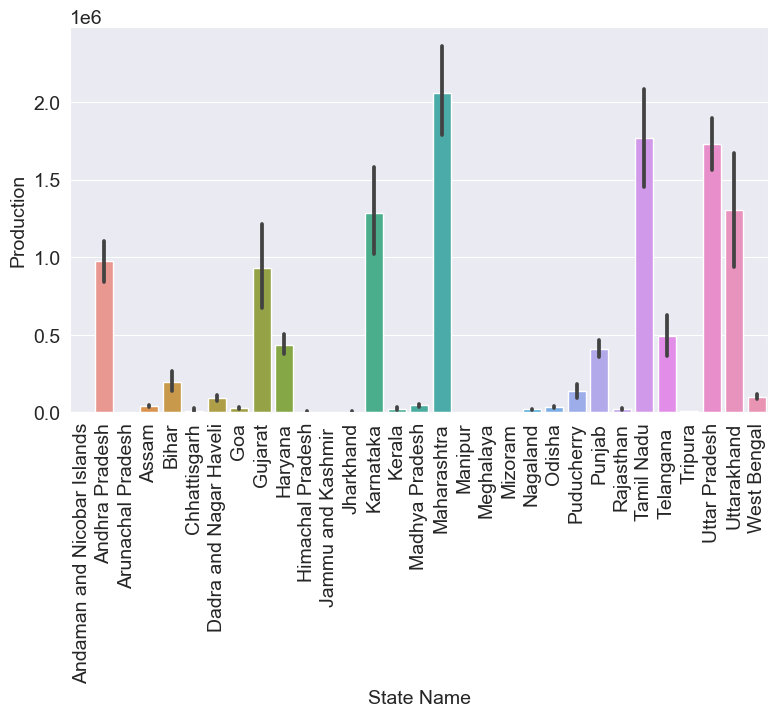

In [37]:
sns.barplot(x= sugarcane['State_Name'],y = sugarcane['Production'])
plt.xticks(rotation = 90)
plt.xlabel('State Name')
plt.ylabel('Production')
plt.show()

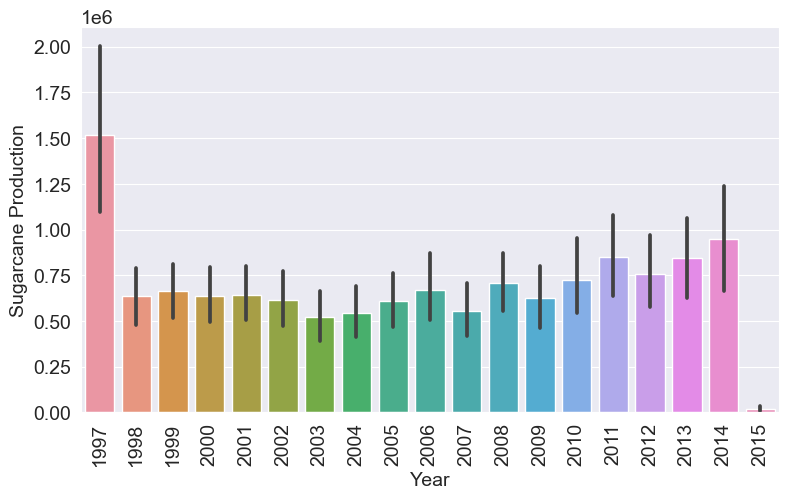

In [39]:
sns.barplot(x= sugarcane['Crop_Year'],y = sugarcane['Production'])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Sugarcane Production')
plt.show()

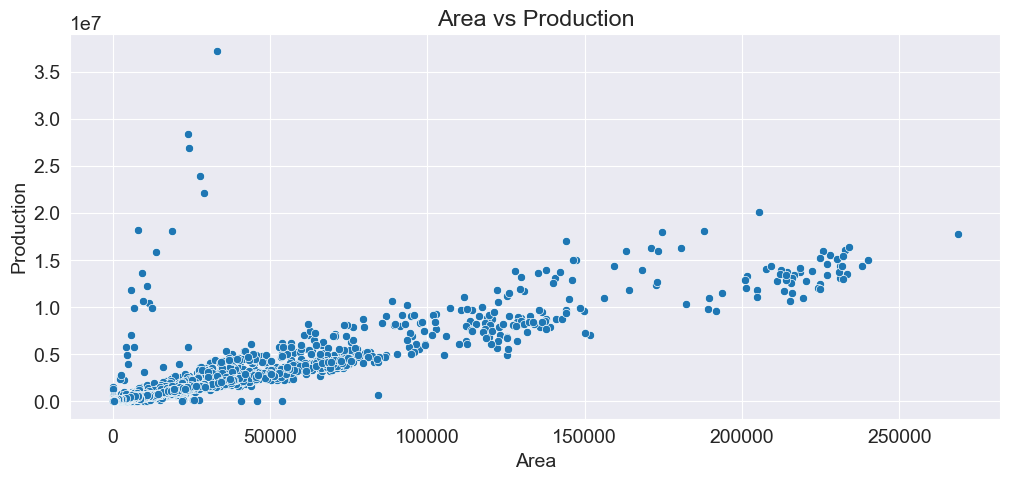

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot(x = sugarcane['Area'],y = sugarcane['Production'])
plt.title('Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

Sugarcane Production: Sugarcane is primarily produced in Maharashtra, followed by Tamil Nadu and Uttar Pradesh. These states have favorable agro-climatic conditions, irrigation facilities, and expertise in sugarcane cultivation, leading to significant production levels.

Maharashtra's Dominance: Maharashtra emerges as the leading state for sugarcane production. The state's large-scale cultivation of sugarcane can be attributed to factors such as suitable soil types, availability of water resources, advanced farming techniques, and a well-established sugar industry.

Tamil Nadu's Contribution: Tamil Nadu ranks second in sugarcane production, indicating its importance in the state's agricultural sector. Factors such as suitable climatic conditions, access to water resources, and investment in irrigation infrastructure contribute to the significant production levels.

Uttar Pradesh's Significance: Uttar Pradesh, one of the most populous states in India, also plays a notable role in sugarcane production. The state's fertile agricultural lands, irrigation facilities, and agricultural practices contribute to substantial sugarcane cultivation.

Economic Impact: Sugarcane production has significant economic implications, as it supports the sugar industry, generates employment opportunities, and contributes to the overall rural economy in the respective states.

Regional Variations: The dominance of Maharashtra, Tamil Nadu, and Uttar Pradesh in sugarcane production indicates regional variations in agricultural practices and preferences. These states showcase their capability to harness the potential of sugarcane cultivation within their unique agro-climatic and geographical contexts.

<AxesSubplot: >

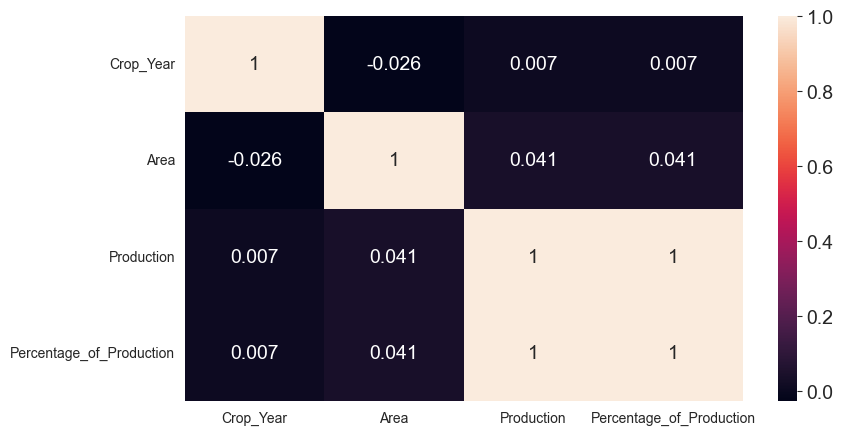

In [49]:
plt.tick_params(labelsize = 10)
sns.heatmap(df.corr(),annot = True)

Based on the correlation table and the previous chats, we can draw the following inferences:

Area and Production: The correlation coefficient between 'Area' and 'Production' is 0.041, indicating a weak positive correlation. This suggests that there is a slight positive relationship between the area of land used for crop cultivation and the resulting crop production.

Production and Production_Percentage_Change: The correlation coefficient between 'Production' and 'Production_Percentage_Change' is 0.00095, which indicates a very weak positive correlation. This implies that there is almost no correlation between the overall production quantity and the percentage change in production over time.

Area and Production_Percentage_Change: The correlation coefficient between 'Area' and 'Production_Percentage_Change' is 0.021, indicating a very weak positive correlation. This suggests that there is a minimal relationship between the area of land used for crop cultivation and the percentage change in production over time.

Overall, the correlation coefficients in the table suggest that there is no strong linear relationship between these variables. This implies that factors other than the area of land, such as climate, agricultural practices, and market dynamics, might have a more significant impact on crop production and its changes over time.

Correlation does not imply causation.

In [51]:
df["Crop_Year"] = pd.to_datetime(df["Crop_Year"], format="%Y")

yearly_production = df.groupby(df["Crop_Year"].dt.year)["Production"].sum()

year_with_highest_production = yearly_production.idxmax()

year_with_lowest_production = yearly_production.idxmin()

print("Year with the highest production:", year_with_highest_production)
print("Year with the lowest production:", year_with_lowest_production)

Year with the highest production: 2011
Year with the lowest production: 2015


Based on the calculations, the highest crop production year in your country is 2011, and the lowest recorded year is 2015. However, upon examining the plot, it becomes evident that the data for the year 2015 might be inaccurate or incomplete, leading to an artificially low value. Therefore, it is important to consider that the actual year with the lowest crop production is 2002.

This discrepancy highlights the significance of data quality and integrity in drawing accurate conclusions. In this case, the data for 2015 seems questionable, and additional investigation or verification may be necessary to obtain a more accurate representation of crop production for that year

# Inferences and Conclusion

Summary of Crop Production Analysis

Top 5 Prominent Crops in India

Coconut is the most produced crop in India, followed by Sugarcane, Rice, Wheat, and Potato.
Coconut and Sugarcane are the highest produced crops, with significantly larger production quantities compared to other crops.

Production Year Analysis

The highest crop production in India was recorded around the year 2011, while the lowest was observed around 2002.
The year 2015 showed lower production, but this could be due to potential data recording issues.

Highest Crop Production by State

Kerala is the state with the highest total crop production across all years, mainly due to its dominant Coconut production.
Andhra Pradesh, Tamil Nadu, Uttar Pradesh, Assam, and West Bengal are among the leading states in crop production.

Correlation Between Crop Production and Other Variables

There is no significant correlation between crop production and land area. Other factors, such as irrigation facilities and farming techniques, influence crop productivity.

Prominent Crops in Andhra Pradesh

Sugarcane and Rice are the prominent crops in Andhra Pradesh, with comparable production quantities.
Other crops like Maize, Groundnut, Cotton(lint), and Banana have lower production quantities compared to the top two crops.

Prominent Crops in Kerala

The top five prominent crops in Kerala are Coconut, Tapioca, Rice, Banana, and Sugarcane.
Coconut production in Kerala is significantly higher compared to other crops.

Crop Production in Districts

Malappuram district in Kerala has the highest crop production, followed by Thiruvananthapuram, Thrissur, and Kannur districts.
Southern states, known for high Coconut production, contribute significantly to the overall crop production in India.

Prominent Wheat-Producing Districts

Ferozpur, Sangrur, Patiala, Ludhiana, Amritsar, Bathinda, and Sirsa are prominent wheat-producing districts in Punjab and Haryana.
The geography and favorable climatic conditions of these regions contribute to their high wheat production.

Top Rice-Producing Districts

Bardhaman and Medinipur West districts in West Bengal are the top rice-producing districts.
Rice production is prominent in areas situated on the banks of rivers, as it requires substantial amounts of water.

Top 15 Crops by Production

The top 15 crops in India, based on production, are Coconut, Sugarcane, Rice, Wheat, Potato, Cotton(lint), Maize, Jute, Banana, Soybean, Bajra, Jowar, Groundnut, Tapioca, and Gram.

Inferences

Coconut and Sugarcane are the highest produced crops, significantly surpassing other crops in production quantity.
Rice and Wheat are the most prominent food crops, consumed widely across India.
Kerala stands out as the highest crop producer, mainly due to its dominant Coconut production.
Punjab and Haryana are the top producers of Wheat, while West Bengal has the highest production of Rice.